In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import pickle
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Importing the DataSet

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Exporatory Data Analysis

In [4]:
#Exploring the df's shape

df.shape

(41188, 21)

In [5]:
#Exploring the type of data for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include = "O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
#Checking for null values
df.isnull().sum()

#There are no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

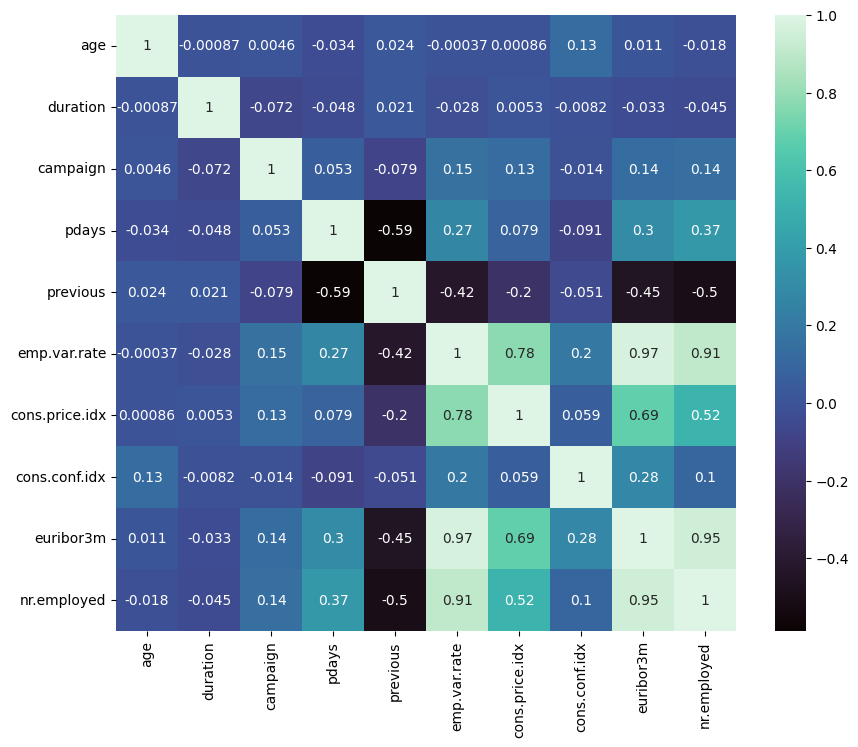

In [9]:
#Plotting correlations

plt.subplots(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot = True, cmap="mako")

In [10]:
#Separating numerical and categorical data
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(include= "O")

#Creating a Label Encoder instance
le = LabelEncoder()

#Enconding categorical data
df_categorical_le = df_categorical.apply(le.fit_transform)

#Concatenating the numerical and label enconded cateroical data sets

df_le = pd.concat([df_numerical, df_categorical_le], axis = 1)
df_le.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


In [11]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  job             41188 non-null  int64  
 11  marital         41188 non-null  int64  
 12  education       41188 non-null  int64  
 13  default         41188 non-null  int64  
 14  housing         41188 non-null  int64  
 15  loan            41188 non-null  int64  
 16  contact         41188 non-null  int64  
 17  month           41188 non-null 

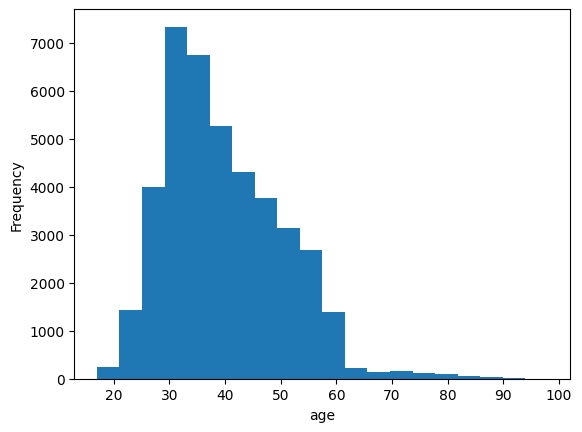

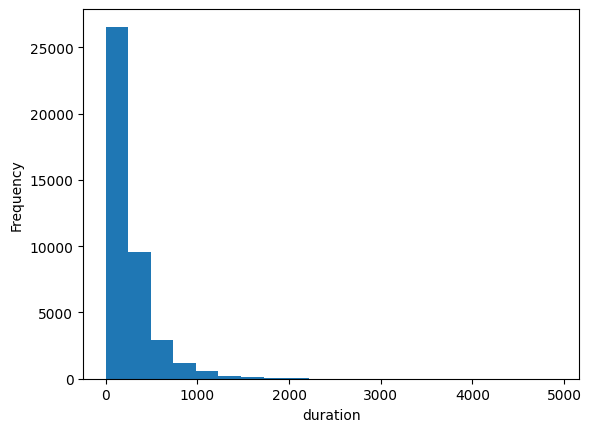

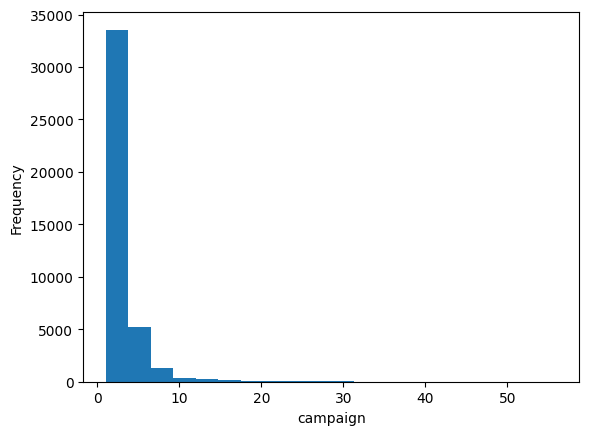

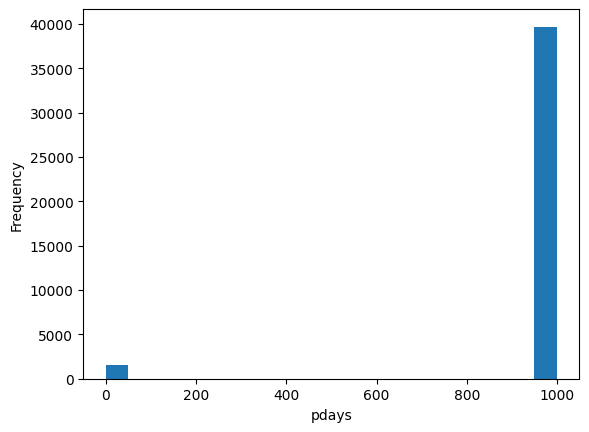

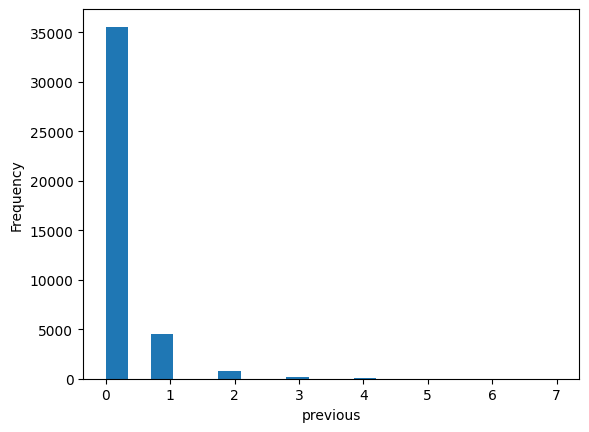

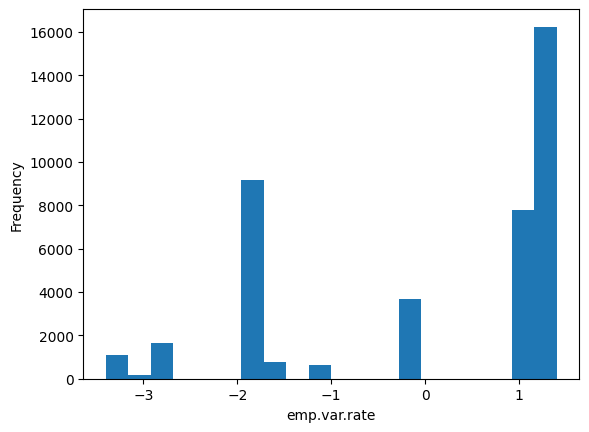

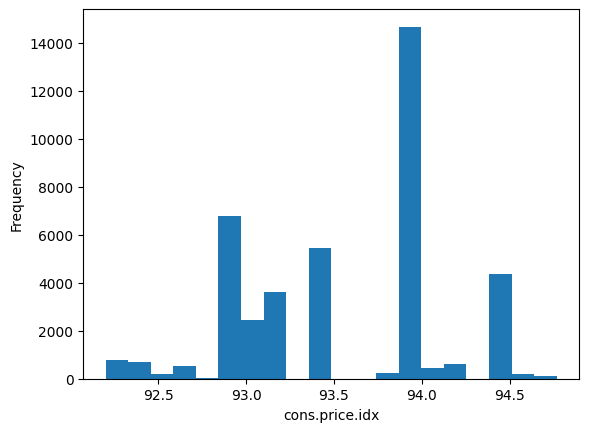

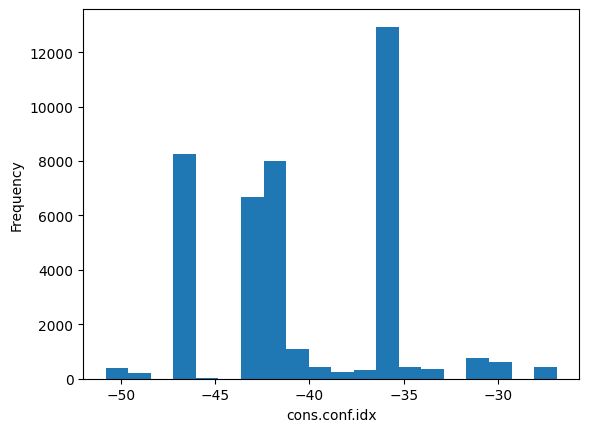

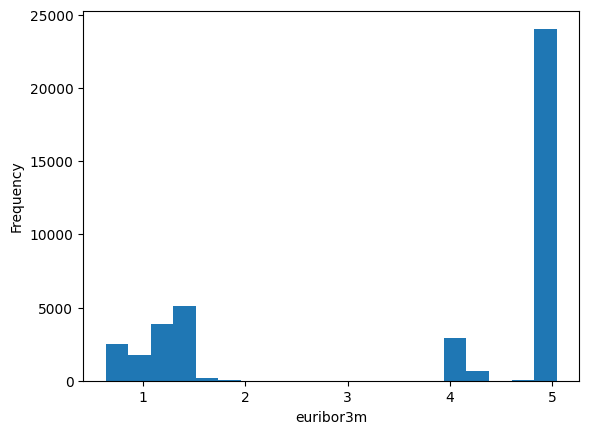

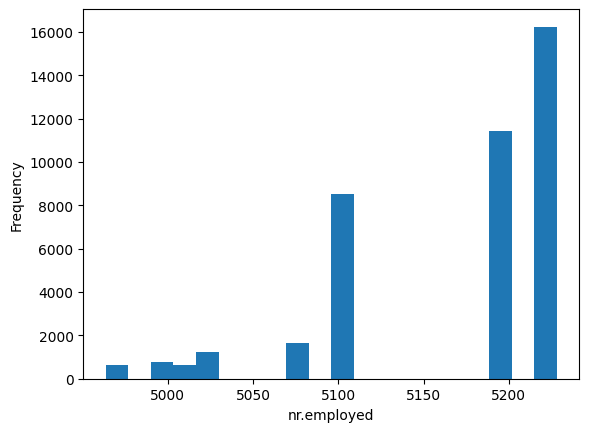

In [12]:
for col in df_numerical.columns:
    df_numerical[col].plot.hist(bins=20)
    plt.xlabel(col)
    plt.show()

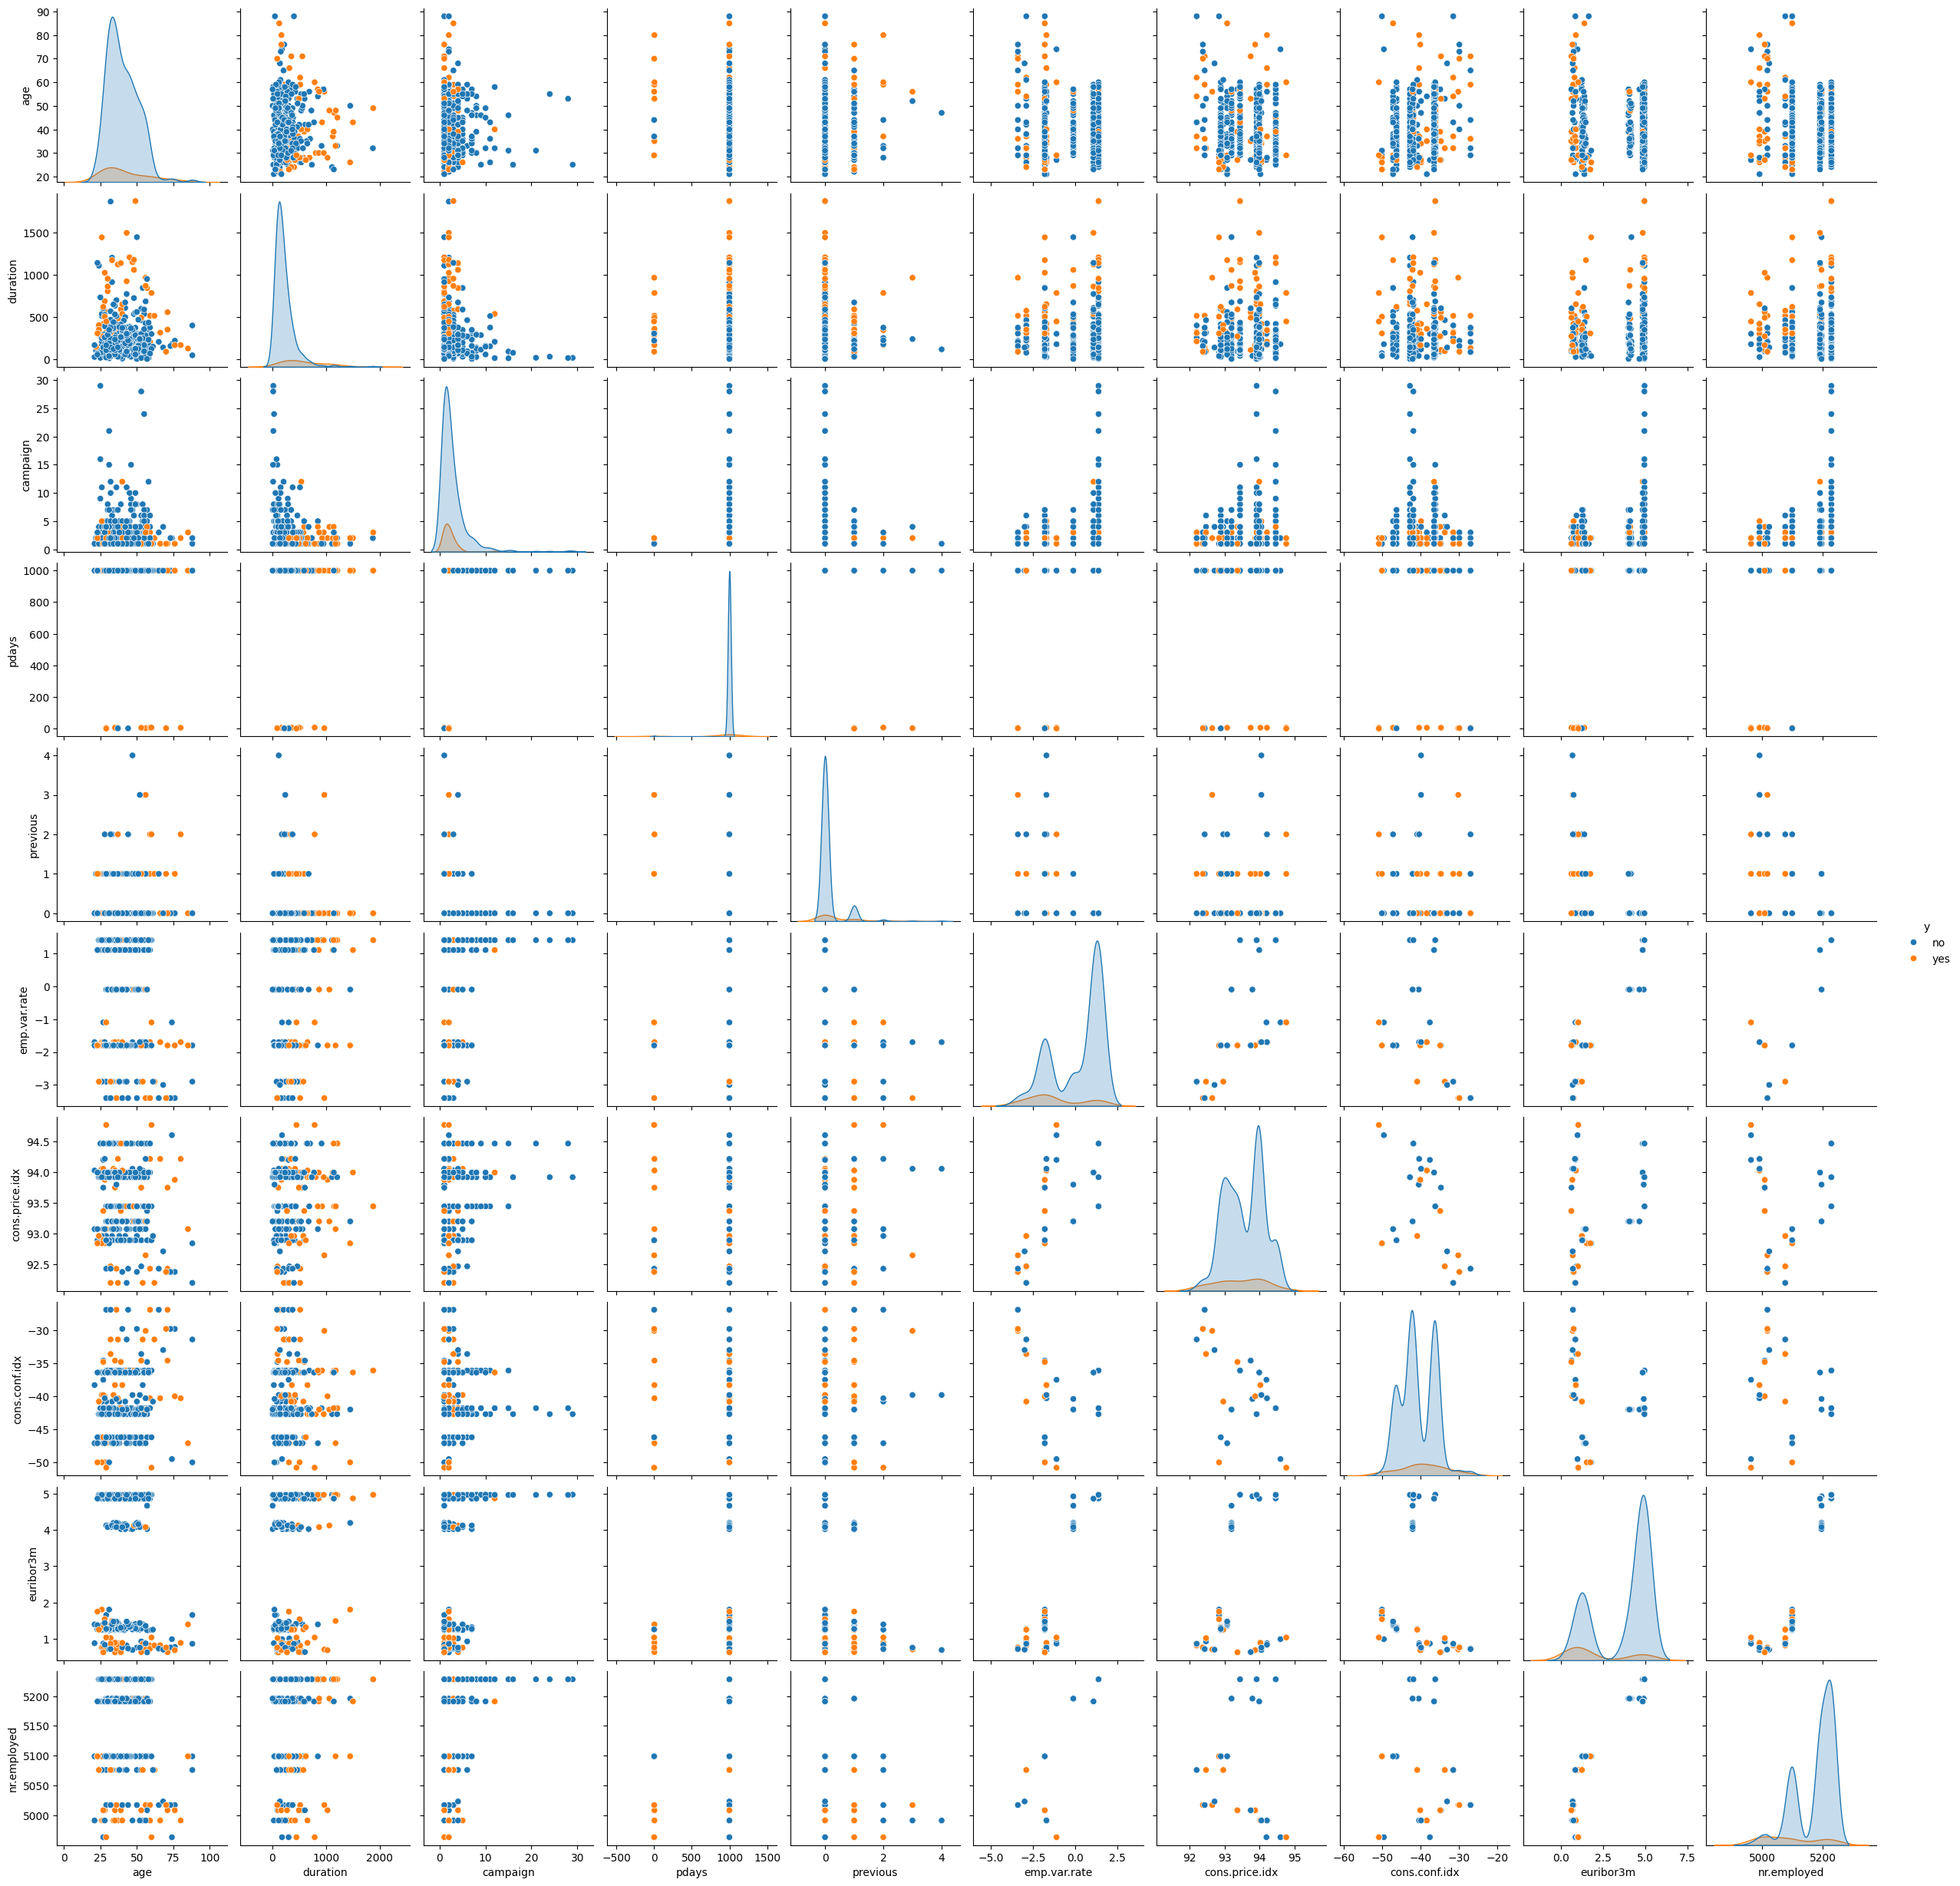

In [13]:
sns.pairplot(df.sample(500), hue="y")

Text(0.5, 1.0, 'Pie Chart of Y Value Counts')

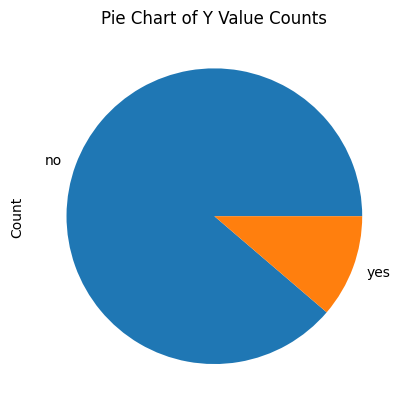

In [14]:
plt.pie(df.y.value_counts(), labels=("no", "yes"))
plt.ylabel("Count")
plt.title("Pie Chart of Y Value Counts")

ML

In [15]:
#Splitting the DataFrame
X = df_le.drop("y", axis = 1)
y = df_le["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
25611,49,227,4,999,0,-0.1,93.200,-42.0,4.120,5195.8,1,1,2,1,0,0,0,7,4,1
26010,37,202,2,999,1,-0.1,93.200,-42.0,4.120,5195.8,2,1,6,0,0,0,1,7,4,0
40194,78,1148,1,999,0,-1.7,94.215,-40.3,0.870,4991.6,5,1,0,0,0,0,0,3,1,1
297,36,120,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,6,0,2,0,1,6,1,1
36344,59,368,2,999,0,-2.9,92.963,-40.8,1.262,5076.2,5,0,6,0,0,0,0,4,3,1


<Axes: xlabel='y'>

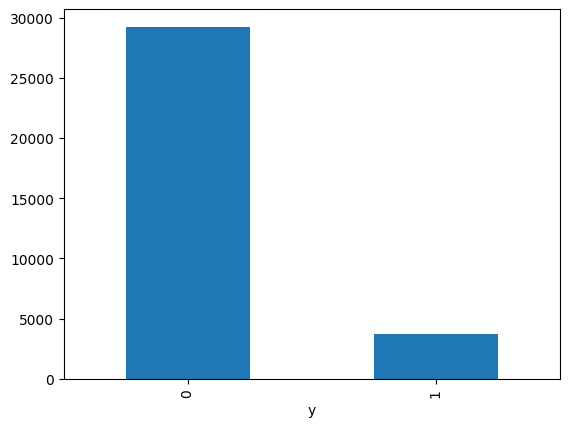

In [16]:
y_train.value_counts().plot.bar()

<Axes: xlabel='y'>

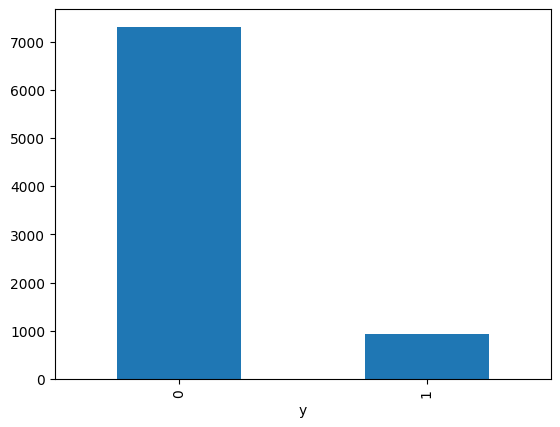

In [17]:
y_test.value_counts().plot.bar()

In [18]:
#Saving the train and test dataframes

X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [19]:
#Instantiation of the model
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train, y_train)


ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact,poutcome
0,227.0,999.0,0.0,-0.1,93.200,4.120,5195.8,0.0,1.0
1,202.0,999.0,1.0,-0.1,93.200,4.120,5195.8,1.0,0.0
2,1148.0,999.0,0.0,-1.7,94.215,0.870,4991.6,0.0,1.0
3,120.0,999.0,0.0,1.1,93.994,4.857,5191.0,1.0,1.0
4,368.0,999.0,0.0,-2.9,92.963,1.262,5076.2,0.0,1.0


In [20]:
#Min-Max Scaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, index = X_train.index, columns = X_train.columns)

X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, index = X_test.index, columns=X_test.columns)

X_train_scaler.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact,poutcome
0,-0.120196,0.196584,-0.350127,-0.114858,-0.648967,0.288964,0.398990,-0.758915,0.193670
1,-0.216732,0.196584,1.653813,-0.114858,-0.648967,0.288964,0.398990,1.317671,-2.552217
2,3.436173,0.196584,-0.350127,-1.133161,1.103451,-1.583296,-2.420139,-0.758915,0.193670
3,-0.533368,0.196584,-0.350127,0.648868,0.721890,0.713535,0.332723,1.317671,0.193670
4,0.424264,0.196584,-0.350127,-1.896888,-1.058152,-1.357472,-1.252175,-0.758915,0.193670


In [21]:
y.unique()

array([0, 1])

In [22]:
timing = timeit.default_timer()
model = LogisticRegression()
model.fit(X_train, y_train)

print(f"training elapsed time: {timeit.default_timer()-timing} seconds")

training elapsed time: 0.1748523250003018 seconds


Assessing the model

In [23]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy_score(y_test, y_predict)

0.910536537994659

In [25]:
f1_score(y_test, y_predict)

np.float64(0.4927735719201652)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.68      0.39      0.49       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [27]:
confusion_matrix(y_test, y_predict)

array([[7143,  167],
       [ 570,  358]])

<Axes: >

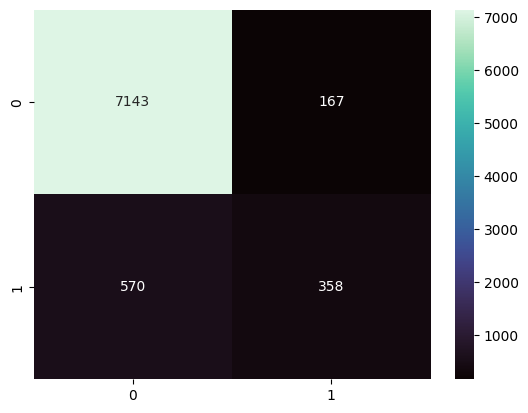

In [28]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d", cmap="mako")

In [29]:

scorer = make_scorer(f1_score)
scorer

make_scorer(f1_score, response_method='predict')

In [30]:
#Adjusting hyperparameters

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

#Initializing the grid
random = RandomizedSearchCV(model, hyperparams, scoring = scorer, cv = 5)
random

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [31]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Random method

random_out = random.fit(X_train, y_train)

print(f"Best hyperparameters: {random.best_params_}")

Best hyperparameters: {'solver': 'newton-cg', 'penalty': None, 'C': 1000}


In [32]:
random_best_clf = random_out.best_estimator_
random_best_clf

LogisticRegression(C=1000, penalty=None, solver='newton-cg')

In [33]:
y_predict = random_best_clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
print(accuracy_score(y_test, y_predict))

0.9118718135469774


In [35]:
print(f1_score(y_test, y_predict))

0.5006877579092159


<Axes: >

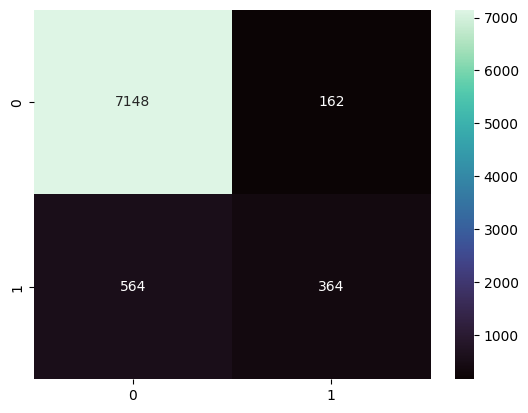

In [36]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d", cmap = "mako")

In [37]:
#Again, defining the hyperparameters
hyperparams = {
    "C": [10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["newton-cg", "sag", "saga"]
}

#Initializing the grid
grid = GridSearchCV(model, hyperparams, scoring = scorer, cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [38]:
#Grid method

grid_out = grid.fit(X_train, y_train)

In [39]:
grid_best = grid_out.best_estimator_
grid_best

LogisticRegression(C=100, solver='newton-cg')

In [40]:
y_predict = grid_best.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
accuracy_score(y_test, y_predict)

0.9118718135469774

In [42]:
print(f1_score(y_test, y_predict))

0.5006877579092159


<Axes: >

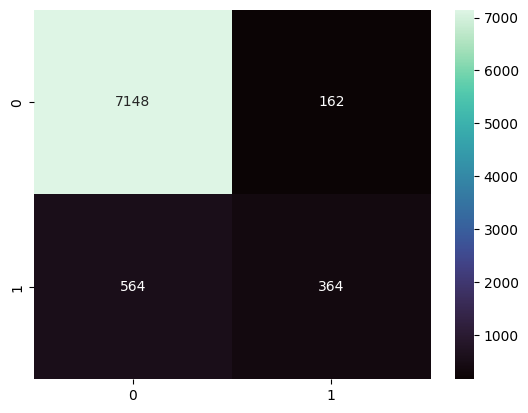

In [43]:
sns.heatmap(confusion_matrix(y_test, y_predict), cmap = "mako", annot=True, fmt="d")

In [44]:
file = open("best_mdl.pkl", "wb")
pickle.dump(grid_best, file)

In [45]:
file = open("best_mdl.pkl","rb")
best_model = pickle.load(file)

In [46]:
y_predict = best_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
accuracy_score(y_test, y_predict)

0.9118718135469774

In [48]:
print(f1_score(y_test, y_predict))

0.5006877579092159
